# Fill in outs v2
## August

I don't really need to compute the whole sequence of outs, I really just need to know if play in an out at first!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import os

# Matt written files
from src.utils import *
from src.plotting import Baseball_Field
from src.game import Game

In [2]:
# pandas options
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

## Pull the sample game that I know a lot about already

Distance between ball and player is large on average, should maybe clean up 12.199183415462679


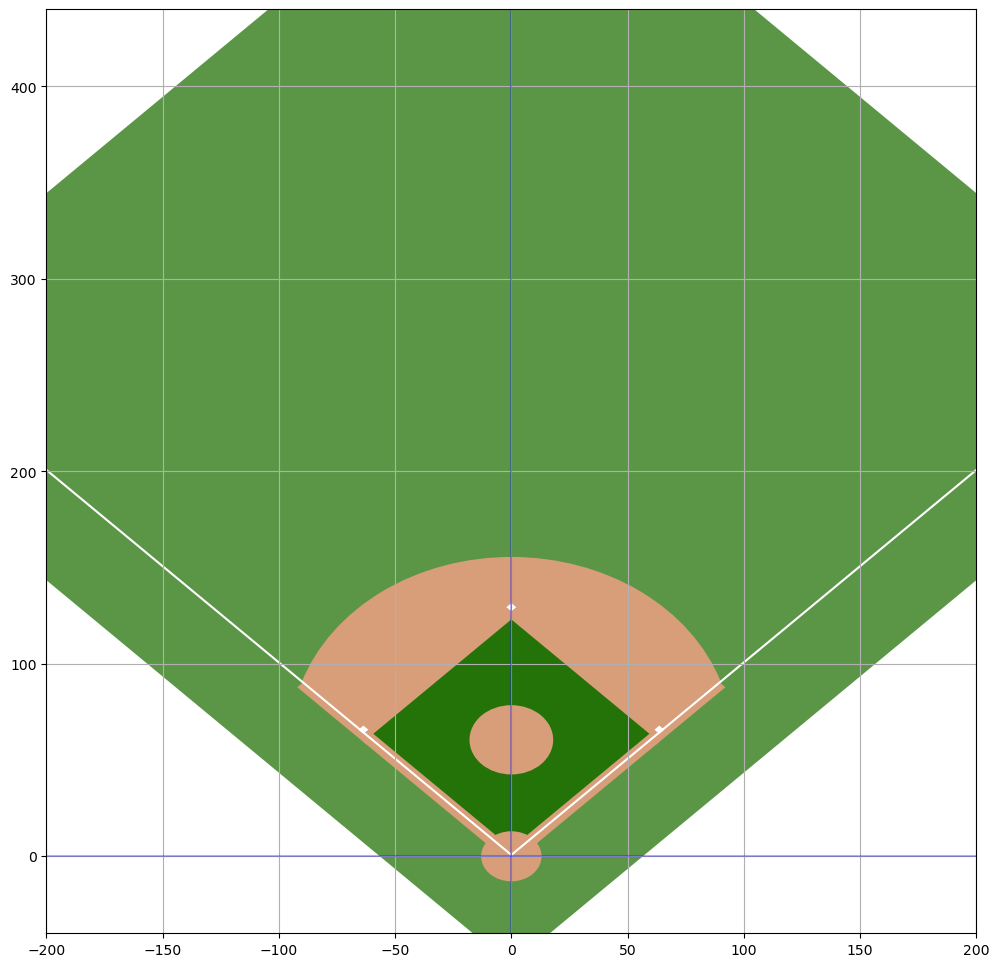

In [4]:
bf_1903_01 = Baseball_Field("1903_01_TeamNE_TeamA2")

In [5]:
game_info_1903_01 = bf_1903_01.game_obj.game_info_df.copy()
game_events_1903_01 = bf_1903_01.game_obj.game_events_df.copy()


game_events_1903_01.head()

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts,prev_event_code,prev_event,prev_event_ts,xy_throw_angle,elevation_throw_angle,throw_velo,batter_dist_to_first,thrower_x,thrower_y,ball_position_x,ball_position_y,ball_position_z,batter_x,batter_y,player_id
0,1903_01_TeamNE_TeamA2,1,1,1,19199,1,1,pitch,2.0,ball acquired,19661.0,NaN,NaN,NaN,NaN,NaN,NaN,89.076422,NaN,NaN,-2.387367,54.28680,6.37134,2.5305,-1.1700,2171
1,1903_01_TeamNE_TeamA2,1,1,1,19661,2,2,ball acquired,5.0,end of play,19661.0,1.0,pitch,19199.0,NaN,NaN,NaN,89.076422,NaN,NaN,-2.034057,-4.11549,3.61398,2.5305,-1.1700,2790
2,1903_01_TeamNE_TeamA2,1,1,1,19661,0,5,end of play,NaN,NaN,NaN,2.0,ball acquired,19661.0,NaN,NaN,NaN,89.076422,NaN,NaN,-2.034057,-4.11549,3.61398,2.5305,-1.1700,NaN
3,1903_01_TeamNE_TeamA2,2,1,2,29858,1,1,pitch,2.0,ball acquired,30320.0,NaN,NaN,NaN,NaN,NaN,NaN,89.114508,NaN,NaN,-2.288160,52.87770,6.40401,2.3136,-1.0173,2171
4,1903_01_TeamNE_TeamA2,2,1,2,30320,2,2,ball acquired,5.0,end of play,30320.0,1.0,pitch,29858.0,NaN,NaN,NaN,89.114508,NaN,NaN,-0.469218,-5.52300,0.34590,2.3136,-1.0173,2790


In [7]:
outs_at_first = game_info_1903_01.loc[
    (game_info_1903_01["is_out_at_first"] == 1),
    :
]

outs_at_first

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half,is_out_at_first
9,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,2,10,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,3790,4474,0,0,1,0.0,2.0,1,1.0,1.0,0.0,0.0,1,1,1,1
17,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,4,18,1,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1972,0,0,0,0,0.0,1.0,1,1.0,0.0,0.0,0.0,1,1,0,1
37,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,9,38,1,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1297,2526,0,2053,2,2.0,1.0,1,1.0,1.0,0.0,1.0,1,1,0,1
57,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,13,58,2,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,6000,6993,0,0,1,2.0,1.0,1,1.0,1.0,0.0,0.0,1,1,1,1
116,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,29,117,3,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,2382,0,0,2790,1,-99.0,-99.0,1,1.0,0.0,0.0,1.0,1,1,0,1
118,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,30,119,4,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,6803,0,0,0,0,0.0,1.0,1,1.0,0.0,0.0,0.0,1,1,1,1
123,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,32,124,4,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,6993,5616,0,0,1,1.0,2.0,1,1.0,1.0,0.0,0.0,1,1,1,1
182,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,46,184,5,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,3790,4474,6000,0,2,-99.0,-99.0,1,1.0,1.0,1.0,0.0,1,1,0,1
183,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,47,185,5,Bottom,4044,7071,5616,6993,9762,6000,3790,4474,7148,1751,0,0,0,0,0.0,1.0,1,1.0,0.0,0.0,0.0,1,1,1,1
222,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,58,224,6,Bottom,4044,7071,5616,6993,9762,6000,3790,4474,7148,2053,0,0,0,0,1.0,1.0,1,1.0,0.0,0.0,0.0,1,1,1,1


In [9]:
not_outs_at_first = game_info_1903_01.loc[
    (game_info_1903_01["is_out_at_first"] == -1),
    :
]

not_outs_at_first

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half,is_out_at_first
147,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,39,149,4,Bottom,6437,7071,5616,6993,9762,6000,3790,4474,7148,1297,2526,2053,1557,3,1.0,1.0,1,1.0,1.0,1.0,1.0,1,1,1,-1


In [87]:
this_half_inning = game_info_1903_01.loc[
    (game_info_1903_01["inning"] == 4) &
    (game_info_1903_01["top_bottom_inning"] == "Bottom"),
    :
]

this_half_inning

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half,is_out_at_first
124,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,33,125,4,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1751,0,0,0,0,0.0,0.0,1,1.0,0.0,0.0,0.0,1,1,1,NaN
125,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,34,126,4,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1972,0,0,1751,1,0.0,0.0,1,1.0,0.0,0.0,1.0,1,1,1,NaN
126,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,34,127,4,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1972,0,0,1751,1,0.0,0.0,1,1.0,0.0,0.0,1.0,1,1,1,NaN
127,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,34,128,4,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1972,0,0,1751,1,0.0,0.0,1,1.0,0.0,0.0,1.0,1,1,1,NaN
128,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,34,129,4,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1972,0,0,1751,1,0.0,1.0,1,1.0,0.0,0.0,1.0,1,1,1,NaN
129,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,35,130,4,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,2973,0,0,0,0,1.0,0.0,1,1.0,0.0,0.0,0.0,1,1,1,NaN
130,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,36,131,4,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1557,2973,0,0,1,1.0,0.0,1,1.0,1.0,0.0,0.0,1,1,1,NaN
131,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,36,132,4,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1557,2973,0,0,1,1.0,0.0,1,1.0,1.0,0.0,0.0,1,1,1,NaN
132,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,36,133,4,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1557,2973,0,0,1,1.0,0.0,1,1.0,1.0,0.0,0.0,1,1,1,NaN
133,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,36,134,4,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1557,2973,0,0,1,1.0,0.0,1,1.0,1.0,0.0,0.0,1,1,1,NaN


In [76]:
this_play_per_game = 62

this_play_events = game_events_1903_01.loc[
    (game_events_1903_01["play_per_game"] == this_play_per_game),
    :


]
this_play_events

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts,prev_event_code,prev_event,prev_event_ts,xy_throw_angle,elevation_throw_angle,throw_velo,batter_dist_to_first,thrower_x,thrower_y,ball_position_x,ball_position_y,ball_position_z,batter_x,batter_y,player_id
228,1903_01_TeamNE_TeamA2,62,15,62,1828723,1,1,pitch,4.0,ball hit into play,1829119.0,NaN,NaN,NaN,NaN,NaN,NaN,91.688236,NaN,NaN,-1.840272,53.082900,6.453630,-2.7060,0.3546,8523
229,1903_01_TeamNE_TeamA2,62,15,62,1829119,10,4,ball hit into play,5.0,end of play,1829416.0,1.0,pitch,1828723.0,NaN,NaN,NaN,91.671577,NaN,NaN,-0.994572,2.456205,2.363433,-2.6970,0.3693,2382
230,1903_01_TeamNE_TeamA2,62,15,62,1829416,0,5,end of play,NaN,NaN,NaN,4.0,ball hit into play,1829119.0,NaN,NaN,NaN,91.659347,NaN,NaN,NaN,NaN,NaN,-2.6904,0.3801,NaN


In [95]:
bf_1903_01.clear_plot()

play_id = bf_1903_01.game_obj.get_pid_from_ppg(185)

#bf_1903_01.plot_all_components(play_id=play_id)
#bf_1903_01.fig


# bf_1903_01.create_gif(play_id=play_id, tag="--4-3 out at first")

MovieWriter ffmpeg unavailable; using Pillow instead.


## A game where the labels the other way are quite wrong!

In [10]:
bf_1902_14 = Baseball_Field("1902_14_TeamMK_TeamB")

In [11]:
game_info_1902_14 = bf_1902_14.game_obj.game_info_df.copy()
game_events_1902_14 = bf_1902_14.game_obj.game_events_df.copy()


game_events_1902_14.head()

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts,prev_event_code,prev_event,prev_event_ts,xy_throw_angle,elevation_throw_angle,throw_velo,batter_dist_to_first,thrower_x,thrower_y,ball_position_x,ball_position_y,ball_position_z,batter_x,batter_y,player_id
0,1902_14_TeamMK_TeamB,1,1.0,1,37685,1,1,pitch,2.0,ball acquired,38135.0,NaN,NaN,NaN,NaN,NaN,NaN,92.401813,NaN,NaN,2.365131,52.539600,5.996640,-3.3918,0.0402,1493
1,1902_14_TeamMK_TeamB,1,1.0,1,38135,2,2,ball acquired,5.0,end of play,38135.0,1.0,pitch,37685.0,NaN,NaN,NaN,92.401813,NaN,NaN,-0.513330,-2.735877,2.342760,-3.3918,0.0402,2925
2,1902_14_TeamMK_TeamB,1,1.0,1,38135,0,5,end of play,NaN,NaN,NaN,2.0,ball acquired,38135.0,NaN,NaN,NaN,92.401813,NaN,NaN,-0.513330,-2.735877,2.342760,-3.3918,0.0402,NaN
3,1902_14_TeamMK_TeamB,2,1.0,2,48485,1,1,pitch,2.0,ball acquired,48985.0,NaN,NaN,NaN,NaN,NaN,NaN,92.092806,NaN,NaN,2.543262,58.204500,6.187110,-3.3156,0.4092,1493
4,1902_14_TeamMK_TeamB,2,1.0,2,48985,2,2,ball acquired,5.0,end of play,48985.0,1.0,pitch,48485.0,NaN,NaN,NaN,92.092806,NaN,NaN,0.637710,-4.374780,1.411011,-3.3156,0.4092,2925


In [12]:
outs_at_first = game_info_1902_14.loc[
    (game_info_1902_14["is_out_at_first"] == 1),
    :
]

outs_at_first

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half,is_out_at_first
8,1902_14_TeamMK_TeamB,TeamB,TeamMK,3.0,9,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4581,0,0,0,0,2.0,1.0,1,1,0,0,0,1,1,1,1
25,1902_14_TeamMK_TeamB,TeamB,TeamMK,9.0,26,2,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,9691,0,0,0,0,0.0,1.0,1,1,0,0,0,1,1,1,1
98,1902_14_TeamMK_TeamB,TeamB,TeamMK,29.0,104,4,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4744,0,0,0,0,2.0,1.0,1,1,0,0,0,1,1,0,1


In [13]:
not_outs_at_first = game_info_1902_14.loc[
    (game_info_1902_14["is_out_at_first"] == -1),
    :
]

not_outs_at_first

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half,is_out_at_first
70,1902_14_TeamMK_TeamB,TeamB,TeamMK,21.0,75,3,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4581,1,8742,0,1,2.0,0.0,0,1,1,0,0,0,1,0,-1


In [109]:
this_half_inning = game_info_1902_14.loc[
    # (game_info_1903_01["inning"] == 2) &
    # (game_info_1903_01["top_bottom_inning"] == "Top"),
    :
]

this_half_inning



,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half,is_out_at_first
0,1902_14_TeamMK_TeamB,TeamB,TeamMK,1.0,1,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,0,0,0,0,0.0,0.0,1,1,0,0,0,1,1,1,NaN
1,1902_14_TeamMK_TeamB,TeamB,TeamMK,1.0,2,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,0,0,0,0,0.0,0.0,1,1,0,0,0,1,1,1,NaN
2,1902_14_TeamMK_TeamB,TeamB,TeamMK,1.0,3,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,0,0,0,0,0.0,1.0,1,1,0,0,0,1,1,1,NaN
3,1902_14_TeamMK_TeamB,TeamB,TeamMK,2.0,4,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,5191,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,NaN
4,1902_14_TeamMK_TeamB,TeamB,TeamMK,2.0,5,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,5191,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,1902_14_TeamMK_TeamB,TeamB,TeamMK,77.0,293,9,Top,1516,2925,2774,1650,2818,1607,1930,2183,1124,9691,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,NaN
286,1902_14_TeamMK_TeamB,TeamB,TeamMK,78.0,294,9,Top,1516,2925,2774,1650,2818,1607,1930,2183,1124,9691,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,NaN
287,1902_14_TeamMK_TeamB,TeamB,TeamMK,78.0,295,9,Top,1516,2925,2774,1650,2818,1607,1930,2183,1124,9691,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,NaN
288,1902_14_TeamMK_TeamB,TeamB,TeamMK,78.0,296,9,Top,1516,2925,2774,1650,2818,1607,1930,2183,1124,9691,0,0,0,0,1.0,1.0,1,1,0,0,0,1,1,1,NaN


In [136]:
bf_1902_14.clear_plot()

play_id = bf_1902_14.game_obj.get_pid_from_ppg(75)

#bf_1902_14.plot_all_components(play_id=play_id)
#bf_1902_14.fig


# bf_1902_14.create_gif(play_id=play_id, tag="--1-3 late throw to first")

MovieWriter ffmpeg unavailable; using Pillow instead.


## SO THIS WAY WORKS PRETTY WELL! Why are some of those plays not showing up though?

- ugh, its because game info is wrong!
    - 119 should have been updated? 

In [124]:
bf_1902_14.game_obj.get_ppg_from_pid(118)

118

In [123]:
this_half_inning

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half,is_out_at_first
0,1902_14_TeamMK_TeamB,TeamB,TeamMK,1.0,1,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,0,0,0,0,0.0,0.0,1,1,0,0,0,1,1,1,0
1,1902_14_TeamMK_TeamB,TeamB,TeamMK,1.0,2,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,0,0,0,0,0.0,0.0,1,1,0,0,0,1,1,1,0
2,1902_14_TeamMK_TeamB,TeamB,TeamMK,1.0,3,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,0,0,0,0,0.0,1.0,1,1,0,0,0,1,1,1,0
3,1902_14_TeamMK_TeamB,TeamB,TeamMK,2.0,4,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,5191,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,0
4,1902_14_TeamMK_TeamB,TeamB,TeamMK,2.0,5,1,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,5191,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,1902_14_TeamMK_TeamB,TeamB,TeamMK,77.0,293,9,Top,1516,2925,2774,1650,2818,1607,1930,2183,1124,9691,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,0
286,1902_14_TeamMK_TeamB,TeamB,TeamMK,78.0,294,9,Top,1516,2925,2774,1650,2818,1607,1930,2183,1124,9691,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,0
287,1902_14_TeamMK_TeamB,TeamB,TeamMK,78.0,295,9,Top,1516,2925,2774,1650,2818,1607,1930,2183,1124,9691,0,0,0,0,1.0,0.0,1,1,0,0,0,1,1,1,0
288,1902_14_TeamMK_TeamB,TeamB,TeamMK,78.0,296,9,Top,1516,2925,2774,1650,2818,1607,1930,2183,1124,9691,0,0,0,0,1.0,1.0,1,1,0,0,0,1,1,1,0


In [125]:
this_half_inning.loc[
    (this_half_inning["play_per_game"] == 118),
    :
]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half,is_out_at_first
112,1902_14_TeamMK_TeamB,TeamB,TeamMK,33.0,118,5,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4317,0,0,0,0,0.0,0.0,1,1,0,0,0,1,1,0,0


In [130]:
game_events_1902_14.loc[
    game_events_1902_14["play_per_game"] == 118
]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts,prev_event_code,prev_event,prev_event_ts,xy_throw_angle,elevation_throw_angle,throw_velo,batter_dist_to_first,thrower_x,thrower_y,ball_position_x,ball_position_y,ball_position_z,batter_x,batter_y,player_id
466,1902_14_TeamMK_TeamB,118,33.0,118,3754185,1,1,pitch,4.0,ball hit into play,3754635.0,NaN,NaN,NaN,NaN,NaN,NaN,91.117759,NaN,NaN,-2.871120,52.089300,5.461560,-2.6343,1.1079,1493
467,1902_14_TeamMK_TeamB,118,33.0,118,3754635,10,4,ball hit into play,16.0,ball bounce,3754985.0,1.0,pitch,3754185.0,NaN,NaN,NaN,91.117759,NaN,NaN,0.569793,2.905917,2.518968,-2.6343,1.1079,4317
468,1902_14_TeamMK_TeamB,118,33.0,118,3754985,255,16,ball bounce,16.0,ball bounce,3755435.0,4.0,ball hit into play,3754635.0,NaN,NaN,NaN,91.117759,NaN,NaN,-8.208150,44.402100,0.236789,-2.6343,1.1079,NaN
469,1902_14_TeamMK_TeamB,118,33.0,118,3755435,255,16,ball bounce,16.0,ball bounce,3755885.0,16.0,ball bounce,3754985.0,NaN,NaN,NaN,86.806125,NaN,NaN,-16.896060,85.343400,0.527634,0.4851,4.0845,NaN
470,1902_14_TeamMK_TeamB,118,33.0,118,3755885,255,16,ball bounce,16.0,ball bounce,3756335.0,16.0,ball bounce,3755435.0,NaN,NaN,NaN,79.648011,NaN,NaN,-23.539830,117.057600,-0.449286,5.6352,9.0567,NaN
471,1902_14_TeamMK_TeamB,118,33.0,118,3756335,255,16,ball bounce,2.0,ball acquired,3756435.0,16.0,ball bounce,3755885.0,NaN,NaN,NaN,70.929359,NaN,NaN,-29.671050,144.467400,-0.062400,11.8659,15.1581,NaN
472,1902_14_TeamMK_TeamB,118,33.0,118,3756435,6,2,ball acquired,3.0,throw (ball-in-play),3757135.0,16.0,ball bounce,3756335.0,NaN,NaN,NaN,68.776566,NaN,NaN,-30.898500,149.084700,0.000000,13.4019,16.6674,1607
473,1902_14_TeamMK_TeamB,118,33.0,118,3757135,6,3,throw (ball-in-play),2.0,ball acquired,3758535.0,2.0,ball acquired,3756435.0,4.040284,9.458043,65.34372,52.064888,-24.5556,152.0655,-27.107700,150.849300,3.539130,25.3221,28.3902,1607
474,1902_14_TeamMK_TeamB,118,33.0,118,3758535,3,2,ball acquired,5.0,end of play,3759335.0,3.0,throw (ball-in-play),3757135.0,NaN,NaN,NaN,14.768955,NaN,NaN,62.931900,68.499300,1.683105,52.5435,53.8929,2774
475,1902_14_TeamMK_TeamB,118,33.0,118,3759335,0,5,end of play,NaN,NaN,NaN,2.0,ball acquired,3758535.0,NaN,NaN,NaN,5.601808,NaN,NaN,NaN,NaN,NaN,67.9821,67.1784,NaN


In [137]:
game_info_1902_14.loc[
    (game_info_1902_14["inning"] == 3) &
    (game_info_1902_14["top_bottom_inning"] == "Top"),
    :
]



,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half,is_out_at_first
61,1902_14_TeamMK_TeamB,TeamB,TeamMK,18.0,66,3,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,8742,0,1,0,0,0.0,0.0,0,1,0,1,0,0,1,0,NaN
62,1902_14_TeamMK_TeamB,TeamB,TeamMK,19.0,67,3,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,8742,0,0,0,0,0.0,0.0,1,1,0,0,0,1,1,0,NaN
63,1902_14_TeamMK_TeamB,TeamB,TeamMK,19.0,68,3,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,8742,0,0,0,0,0.0,0.0,1,1,0,0,0,1,1,0,NaN
64,1902_14_TeamMK_TeamB,TeamB,TeamMK,19.0,69,3,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,8742,0,0,0,0,0.0,0.0,1,1,0,0,0,1,1,0,NaN
65,1902_14_TeamMK_TeamB,TeamB,TeamMK,19.0,70,3,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,8742,0,0,0,0,0.0,0.0,1,1,0,0,0,1,1,0,NaN
66,1902_14_TeamMK_TeamB,TeamB,TeamMK,19.0,71,3,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,8742,0,0,1,0.0,0.0,0,1,0,0,0,0,1,0,NaN
67,1902_14_TeamMK_TeamB,TeamB,TeamMK,20.0,72,3,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4264,8742,0,0,1,0.0,1.0,1,1,1,0,0,1,1,0,NaN
68,1902_14_TeamMK_TeamB,TeamB,TeamMK,20.0,73,3,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,5191,8742,0,0,1,1.0,0.0,1,1,1,0,0,1,1,0,NaN
69,1902_14_TeamMK_TeamB,TeamB,TeamMK,21.0,74,3,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,5191,8742,0,0,1,1.0,1.0,1,1,1,0,0,1,1,0,NaN
70,1902_14_TeamMK_TeamB,TeamB,TeamMK,21.0,75,3,Top,1493,2925,2774,1650,2818,1607,1930,2183,1124,4581,1,8742,0,1,2.0,0.0,0,1,1,0,0,0,1,0,NaN


## Try a game that didn't work before!

- "1902_13_TeamMK_TeamB", "1903_27_TeamNH_TeamA3", "1902_07_TeamMJ_TeamB", "1902_20_TeamME_TeamA2",

In [16]:
bf = Baseball_Field("1902_07_TeamMJ_TeamB", which_outs=["at_first"])

In [17]:
g_info = bf.game_obj.game_info_df.copy()
g_events = bf.game_obj.game_events_df.copy()


g_events.head()

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts,prev_event_code,prev_event,prev_event_ts,xy_throw_angle,elevation_throw_angle,throw_velo,batter_dist_to_first,thrower_x,thrower_y,ball_position_x,ball_position_y,ball_position_z,batter_x,batter_y,player_id
0,1902_07_TeamMJ_TeamB,1,1.0,1,22462,1,1,pitch,2.0,ball acquired,22912.0,NaN,NaN,NaN,NaN,NaN,NaN,91.899826,NaN,NaN,-1.467792,52.989600,6.078180,-4.2894,1.7427,2359
1,1902_07_TeamMJ_TeamB,1,1.0,1,22912,2,2,ball acquired,5.0,end of play,22912.0,1.0,pitch,22462.0,NaN,NaN,NaN,92.261559,NaN,NaN,-0.362913,-6.206730,1.793022,-4.5672,1.5105,2925
2,1902_07_TeamMJ_TeamB,1,1.0,1,22912,0,5,end of play,NaN,NaN,NaN,2.0,ball acquired,22912.0,NaN,NaN,NaN,92.261559,NaN,NaN,-0.362913,-6.206730,1.793022,-4.5672,1.5105,NaN
3,1902_07_TeamMJ_TeamB,2,1.0,2,36212,1,1,pitch,4.0,ball hit into play,36662.0,NaN,NaN,NaN,NaN,NaN,NaN,91.777891,NaN,NaN,-2.248263,57.407100,6.390540,-2.5962,0.1101,2359
4,1902_07_TeamMJ_TeamB,2,1.0,2,36662,10,4,ball hit into play,5.0,end of play,36812.0,1.0,pitch,36212.0,NaN,NaN,NaN,91.811176,NaN,NaN,0.256783,-1.288959,1.652064,-2.7405,0.2127,8642


In [21]:
outs_at_first = g_info.loc[
    (g_info["is_out_at_first"] == 1),
    :
]

outs_at_first

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,is_out_at_first
75,1902_07_TeamMJ_TeamB,TeamB,TeamMJ,22,76,3,Top,2359,2925,1918,1607,1748,1650,1930,2183,1124,4086,0,8240,0,1,NaN,NaN,1,1
84,1902_07_TeamMJ_TeamB,TeamB,TeamMJ,24,85,3,Bottom,9563,3238,9384,9087,4086,8240,7023,8642,7679,1748,0,0,0,0,NaN,NaN,1,1
92,1902_07_TeamMJ_TeamB,TeamB,TeamMJ,27,93,4,Top,2359,2925,1918,1607,1748,1650,1930,2183,1124,9384,0,0,0,0,NaN,NaN,1,1
127,1902_07_TeamMJ_TeamB,TeamB,TeamMJ,34,129,4,Bottom,9563,3238,9384,9087,4086,8240,7023,8642,7679,1650,0,0,0,0,NaN,NaN,1,1
134,1902_07_TeamMJ_TeamB,TeamB,TeamMJ,36,136,5,Top,2595,2925,1918,1607,1748,1650,1930,2183,1124,7023,0,8240,0,1,NaN,NaN,1,1
173,1902_07_TeamMJ_TeamB,TeamB,TeamMJ,46,176,6,Top,2595,2925,1918,1607,1748,1650,1930,2183,1124,9087,0,0,0,0,NaN,NaN,1,1
177,1902_07_TeamMJ_TeamB,TeamB,TeamMJ,47,180,6,Top,2595,2925,1918,1607,1748,1650,1930,2183,1124,3238,0,0,0,0,NaN,NaN,1,1


In [22]:
no_outs_at_first = g_info.loc[
    (g_info["is_out_at_first"] == -1),
    :
]

no_outs_at_first

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,is_out_at_first
276,1902_07_TeamMJ_TeamB,TeamB,TeamMJ,75,282,9,Bottom,8243,3238,9384,9087,4086,8240,7023,8642,7679,2646,1918,0,0,1,NaN,NaN,1,-1


In [26]:
bf.clear_plot()

play_id = bf.game_obj.get_pid_from_ppg(282)

# bf.plot_all_components(play_id=play_id)
# bf.fig

# bf.create_gif(play_id=play_id, tag="--4-3 no out")

MovieWriter ffmpeg unavailable; using Pillow instead.


In [27]:
g_events.loc[
    g_events["play_per_game"] == 282
]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts,prev_event_code,prev_event,prev_event_ts,xy_throw_angle,elevation_throw_angle,throw_velo,batter_dist_to_first,thrower_x,thrower_y,ball_position_x,ball_position_y,ball_position_z,batter_x,batter_y,player_id
1081,1902_07_TeamMJ_TeamB,281,75.0,282,10565802,1,1,pitch,4.0,ball hit into play,10566252.0,NaN,NaN,NaN,NaN,NaN,NaN,88.950879,NaN,NaN,-1.674720,52.484100,5.501160,2.4603,-0.9309,8243
1082,1902_07_TeamMJ_TeamB,281,75.0,282,10566252,10,4,ball hit into play,16.0,ball bounce,10566302.0,1.0,pitch,10565802.0,NaN,NaN,NaN,87.441020,NaN,NaN,0.867543,-0.328959,1.075758,3.4818,0.1812,2646
1083,1902_07_TeamMJ_TeamB,281,75.0,282,10566302,255,16,ball bounce,16.0,ball bounce,10567202.0,4.0,ball hit into play,10566252.0,NaN,NaN,NaN,87.273097,NaN,NaN,1.560600,5.145000,-0.070200,3.5955,0.3048,NaN
1084,1902_07_TeamMJ_TeamB,281,75.0,282,10567202,255,16,ball bounce,2.0,ball acquired,10567952.0,16.0,ball bounce,10566302.0,NaN,NaN,NaN,84.628382,NaN,NaN,44.321100,75.252600,0.159991,4.4847,3.1197,NaN
1085,1902_07_TeamMJ_TeamB,281,75.0,282,10567952,4,2,ball acquired,3.0,throw (ball-in-play),10569302.0,16.0,ball bounce,10567202.0,NaN,NaN,NaN,70.131890,NaN,NaN,67.905000,115.976400,0.000000,14.1603,13.9377,9087
1086,1902_07_TeamMJ_TeamB,281,75.0,282,10569302,4,3,throw (ball-in-play),2.0,ball acquired,10570052.0,2.0,ball acquired,10567952.0,0.460673,8.632045,57.791332,37.228126,77.2716,116.4831,75.191400,121.528200,0.701097,37.3143,37.3164,9087
1087,1902_07_TeamMJ_TeamB,281,75.0,282,10570052,3,2,ball acquired,5.0,end of play,10570452.0,3.0,throw (ball-in-play),10569302.0,NaN,NaN,NaN,16.164450,NaN,NaN,64.925100,64.770000,4.776960,51.2841,53.2170,9384
1088,1902_07_TeamMJ_TeamB,281,75.0,282,10570452,0,5,end of play,NaN,NaN,NaN,2.0,ball acquired,10570052.0,NaN,NaN,NaN,5.203746,NaN,NaN,NaN,NaN,NaN,58.7550,61.8453,NaN


In [28]:
g_info.loc[
    (g_info["inning"] == 9) &
    (g_info["top_bottom_inning"] == "Bottom"),
    :
]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,is_out_at_first
270,1902_07_TeamMJ_TeamB,TeamB,TeamMJ,73,276,9,Bottom,8243,3238,9384,9087,4086,8240,7023,8642,7679,1918,0,0,0,0,0.0,NaN,1,0
271,1902_07_TeamMJ_TeamB,TeamB,TeamMJ,73,277,9,Bottom,8243,3238,9384,9087,4086,8240,7023,8642,7679,1918,0,0,0,0,NaN,NaN,1,0
272,1902_07_TeamMJ_TeamB,TeamB,TeamMJ,74,278,9,Bottom,8243,3238,9384,9087,4086,8240,7023,8642,7679,1918,0,0,0,0,NaN,NaN,1,0
273,1902_07_TeamMJ_TeamB,TeamB,TeamMJ,74,279,9,Bottom,8243,3238,9384,9087,4086,8240,7023,8642,7679,1918,0,0,0,0,NaN,NaN,1,0
274,1902_07_TeamMJ_TeamB,TeamB,TeamMJ,74,280,9,Bottom,8243,3238,9384,9087,4086,8240,7023,8642,7679,2646,1918,0,0,1,NaN,NaN,1,0
275,1902_07_TeamMJ_TeamB,TeamB,TeamMJ,75,281,9,Bottom,8243,3238,9384,9087,4086,8240,7023,8642,7679,2646,1918,0,0,1,NaN,NaN,1,0
276,1902_07_TeamMJ_TeamB,TeamB,TeamMJ,75,282,9,Bottom,8243,3238,9384,9087,4086,8240,7023,8642,7679,2646,1918,0,0,1,NaN,NaN,1,-1
277,1902_07_TeamMJ_TeamB,TeamB,TeamMJ,76,283,9,Bottom,8243,3238,9384,9087,4086,8240,7023,8642,7679,1124,2646,1918,0,2,NaN,NaN,1,0
278,1902_07_TeamMJ_TeamB,TeamB,TeamMJ,77,284,9,Bottom,8243,3238,9384,9087,4086,8240,7023,8642,7679,1124,2646,1918,0,2,NaN,NaN,1,0
279,1902_07_TeamMJ_TeamB,TeamB,TeamMJ,77,285,9,Bottom,8243,3238,9384,9087,4086,8240,7023,8642,7679,1650,0,2646,1918,2,NaN,NaN,1,0
